In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### --- compare AP, precision, recall ---

In [2]:
refinedet_not_crop = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/b2/tcb5_im512/class_df.csv')
refinedet_not_crop = refinedet_not_crop.drop('Unnamed: 0', axis=1)
refinedet_crop = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512/class_df.csv')
refinedet_crop = refinedet_crop.drop('Unnamed: 0', axis=1)

In [3]:
ap_df = pd.DataFrame(columns=["AP", "precision", "recall"])
ap_df = ap_df.append(refinedet_not_crop, ignore_index=True)
ap_df = ap_df.append(refinedet_crop, ignore_index=True)
ap_df.index = ["refinedet_not_crop", "refinedet_crop"]
ap_df

,AP,precision,recall
refinedet_not_crop,0.503478,0.260309,0.648475
refinedet_crop,0.690169,0.805217,0.743178


### --- compare accuracy per size ---

In [4]:
det_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512_freeze_All0to2_training/each_size_df.csv')
det_each_size_df["order"] = det_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(det_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})
insect_size_df = insect_size_df.drop([0, 1, 2, 3, 4, 5, 6, 16, 17], axis=0)
insect_size_df.index = [i for i in range(0,9)]
insect_size_df

,order,count
0,7.0,426
1,8.0,854
2,9.0,548
3,10.0,1129
4,11.0,1267
5,12.0,772
6,13.0,392
7,14.0,211
8,15.0,65


In [5]:
refinedet_not_crop = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/b2/tcb5_im512/all_size_df.csv')
refinedet_not_crop = refinedet_not_crop.drop('Unnamed: 0', axis=1)
refinedet_crop = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/master_paper/crop_b2/tcb5_im512/all_size_df.csv')
refinedet_crop = refinedet_crop.drop('Unnamed: 0', axis=1)

In [6]:
insect_size_df["Insect_size"] = refinedet_crop["Insect_size"]
insect_size_df

,order,count,Insect_size
0,7.0,426,224.800000
1,8.0,854,394.436464
2,9.0,548,726.137566
3,10.0,1129,1420.392857
4,11.0,1267,2870.260000
5,12.0,772,6288.526316
6,13.0,392,11189.978723
7,14.0,211,22611.437500
8,15.0,65,37326.666667


In [7]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["refinedet_not_crop"] = refinedet_not_crop["Accuracy"]
all_df["refinedet_crop"] = refinedet_crop["Accuracy"]
all_df

,order,count,refinedet_not_crop,refinedet_crop
0,7.0,426,0.200000,0.533333
1,8.0,854,0.486188,0.723757
2,9.0,548,0.603175,0.719577
3,10.0,1129,0.785714,0.726190
4,11.0,1267,0.880000,0.680000
5,12.0,772,0.815789,0.815789
6,13.0,392,0.829787,0.936170
7,14.0,211,1.000000,0.937500
8,15.0,65,1.000000,1.000000


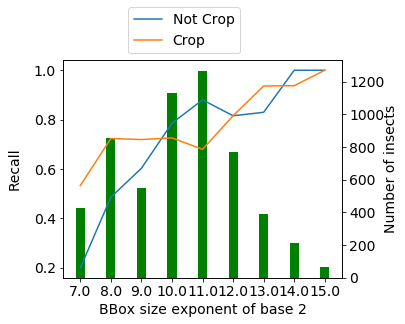

In [8]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["refinedet_not_crop"], label="Not Crop")
ax2.plot(x_label, all_df["refinedet_crop"], label="Crop")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.66, 1.), loc='lower right', fontsize=14)

ax1.set_xlabel("BBox size exponent of base 2", fontsize=14)
ax1.set_ylabel("Recall", fontsize=14)
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Number of insects", fontsize=14)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_crop/compare_accuracy_per_size.png", bbox_inches="tight")